In [1]:
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [2]:
def create_target_label(df):
    
    """
    Function takes as input the data-frame and creates a binary variable = 1 if taking this trade would have increased the 
    score, and 0 otherwise.
    """
    
    df['y'] = 0
    mask = df[['resp','resp_1','resp_2','resp_3','resp_4']].sum(axis = 1) >= 0
    df.loc[mask,'y'] = 1
    
    return df

In [3]:
df = pd.read_csv('C:/Users/mathias.buxhoeveden/Desktop/kagglepm/Data/train.csv', nrows= 200000)

In [4]:
#Flag trades that will increase the target-score!

df = create_target_label(df = df)

In [6]:
df.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id,y
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0,1
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1,0
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2,1
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3,0
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4,0


In [5]:
print("{}% of trades should be accepted!".format(100*df.y.mean()))

51.8405% of trades should be accepted!


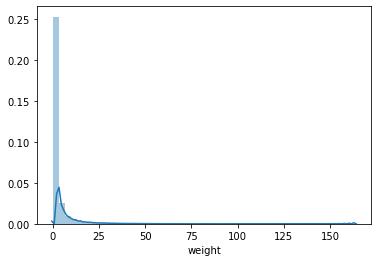

In [120]:
#Check distribution of weights!

sns.distplot(df.weight)

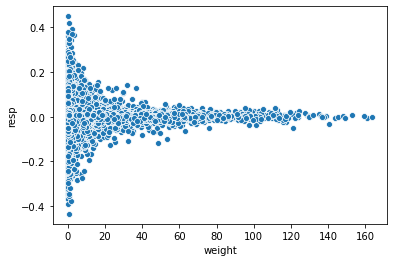

In [122]:
#Investigates how weights are constructed. Correlation against returns?

sns.scatterplot(x = 'weight', y = 'resp', data = df)

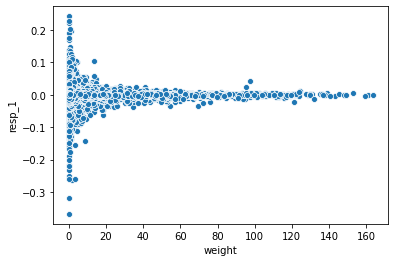

In [124]:
sns.scatterplot(x = 'weight', y = 'resp_1', data = df)

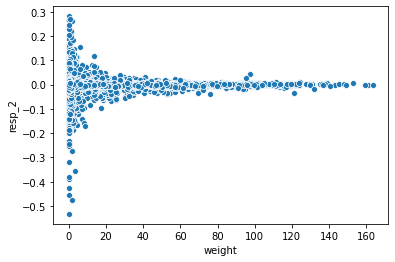

In [125]:
sns.scatterplot(x = 'weight', y = 'resp_2', data = df)

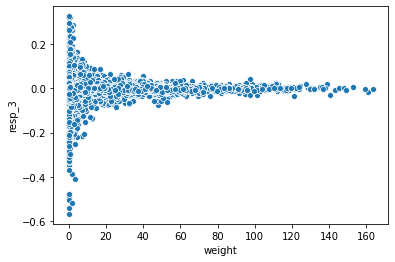

In [126]:
sns.scatterplot(x = 'weight', y = 'resp_3', data = df)

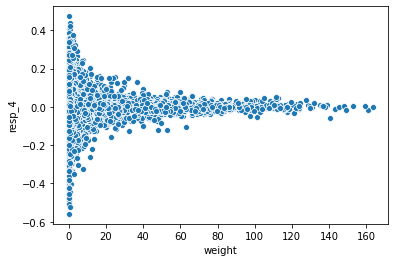

In [127]:
sns.scatterplot(x = 'weight', y = 'resp_4', data = df)

In [ ]:
#The weights appear to be uncorrelated with returns, unclear how these weights are constructed!

In [108]:
X = df.drop(['date', 'weight','resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp','ts_id','y'], axis = 1)
y = df.y

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [110]:
model = XGBClassifier()

In [111]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [112]:
y_pred_test = model.predict(X_test)

In [113]:
y_train_train = model.predict(X_train)

In [114]:
test_accuracy = accuracy_score(y_test, y_pred_test, sample_weight )

In [115]:
train_accuracy = accuracy_score(y_train, y_train_train)

In [116]:
print("The train accuracy is: {}, the test accuracy is: {}".format(train_accuracy, test_accuracy))

The train accuracy is: 0.7276268656716418, the test accuracy is: 0.6287424242424242


In [144]:
#Save file!

pickle.dump(model, open("model.p", "wb"))